利用GPT大型模型工具完成数据洞察
本周以及下周的实验内容如下：
请同学们参考《GPT数据科学系列课程实验手册》内容，并结合之前的作业经验，对GitHub上具有协作行为日志数据的500名用户的个人信息（包括姓名、公司、邮箱及其地理位置等）进行数据洞察分析。数据获取链接为：https://github.com/X-lab2017/dase-2024-autumn/tree/main/HomeWork/data/user_data

实验目标
培养数据处理与分析能力：通过实际操作，提升对大规模数据集的处理和分析能力。
掌握GPT工具的应用：学习如何利用GPT大型模型工具辅助完成数据洞察任务。
理解数据隐私与伦理：在处理包含个人信息的数据时，遵循数据隐私保护的原则和规范。
实验内容
人口统计分析
国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。
协作行为分析
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。
其他维度有趣的洞察（至少2个）
提交内容
数据分析代码。
最终的数据洞察报告（PDF格式）。

读取数据集

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('users_combined_info_500.csv')
data.head()

,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00


国家与地区分布

国家分布情况：
country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia                 4248
Russia                 

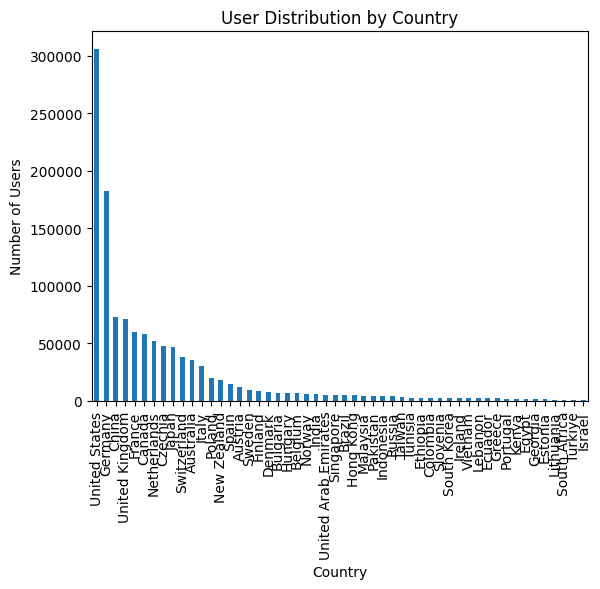

In [5]:
country_distribution = data['country'].value_counts()
print("国家分布情况：")
print(country_distribution)

# 可视化国家分布
country_distribution.plot(kind='bar')
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

城市级别分布

In [ ]:
city_distribution = data['location'].value_counts()
print("城市分布情况：")
print(city_distribution)


城市分布情况：
location
Germany                               107747
Prague                                 37757
Japan                                  26986
Palo Alto, CA                          19215
UK                                     17789
                                       ...  
北京                                       644
Everything everywhere all at once.       635
Delaware (but Philly at heart)           599
Seville, Spain                           582
Phoenixville, PA                          75
Name: count, Length: 344, dtype: int64


时区分布

时区分布情况：
time_zone
UTC + 1       500521
UTC - 5       369157
UTC + 8        91337
UTC + 0        76182
UTC + 9        49081
UTC + 10       35746
UTC + 2        27477
UTC + 12       18444
UTC + 3         9717
UTC + 4         7109
UTC + 7         6681
UTC + 5:30      5689
UTC - 3         5022
UTC + 5         4462
Name: count, dtype: int64


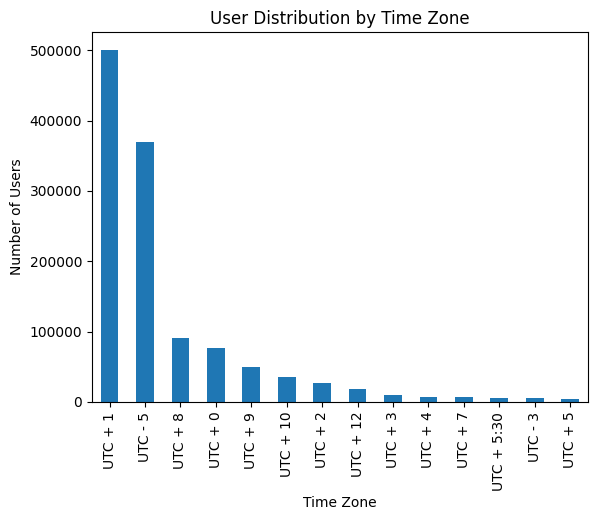

In [8]:
timezone_mapping = {
    "United States": "UTC - 5",
    "Germany": "UTC + 1",
    "China": "UTC + 8",
    "United Kingdom": "UTC + 0",
    "France": "UTC + 1",
    "Canada": "UTC - 5",
    "Netherlands": "UTC + 1",
    "Czechia": "UTC + 1",
    "Japan": "UTC + 9",
    "Switzerland": "UTC + 1",
    "Australia": "UTC + 10",
    "Italy": "UTC + 1",
    "Poland": "UTC + 1",
    "New Zealand": "UTC + 12",
    "Spain": "UTC + 1",
    "Austria": "UTC + 1",
    "Sweden": "UTC + 1",
    "Finland": "UTC + 2",
    "Denmark": "UTC + 1",
    "Bulgaria": "UTC + 2",
    "Hungary": "UTC + 1",
    "Belgium": "UTC + 1",
    "Norway": "UTC + 1",
    "India": "UTC + 5:30",
    "United Arab Emirates": "UTC + 4",
    "Singapore": "UTC + 8",
    "Brazil": "UTC - 3",
    "Hong Kong": "UTC + 8",
    "Malaysia": "UTC + 8",
    "Pakistan": "UTC + 5",
    "Indonesia": "UTC + 7",
    "Russia": "UTC + 3",
    "Taiwan": "UTC + 8",
    "Tunisia": "UTC + 1",
    "Ethiopia": "UTC + 3",
    "Colombia": "UTC - 5",
    "Slovenia": "UTC + 1",
    "South Korea": "UTC + 9",
    "Ireland": "UTC + 0",
    "Vietnam": "UTC + 7",
    "Lebanon": "UTC + 2",
    "Ecuador": "UTC - 5",
    "Greece": "UTC + 2",
    "Portugal": "UTC + 0",
    "Kenya": "UTC + 3",
    "Egypt": "UTC + 2",
    "Georgia": "UTC + 4",
    "Estonia": "UTC + 2",
    "Lithuania": "UTC + 2",
    "South Africa": "UTC + 2",
    "Türkiye": "UTC + 3",
    "Israel": "UTC + 2"
}


data['time_zone'] = data['country'].map(timezone_mapping)
time_zone_distribution = data['time_zone'].value_counts()
print("时区分布情况：")
print(time_zone_distribution)

# 可视化时区分布
time_zone_distribution.plot(kind='bar')
plt.title('User Distribution by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of Users')
plt.show()

协作行为分析

高活跃用户:
 user_id
13564        3140
26967        3214
27350        4509
32321        3284
47313        3356
             ... 
66076021     3735
74887181     2997
88161975     3394
91018726     4098
100913391    3177
Length: 100, dtype: int64
低活跃用户:
 user_id
2621         796
23304       1278
47792       1337
57224       1225
94272       1116
            ... 
62513924    1068
62625502     621
71636191    1158
83238715     923
89584709     862
Length: 100, dtype: int64


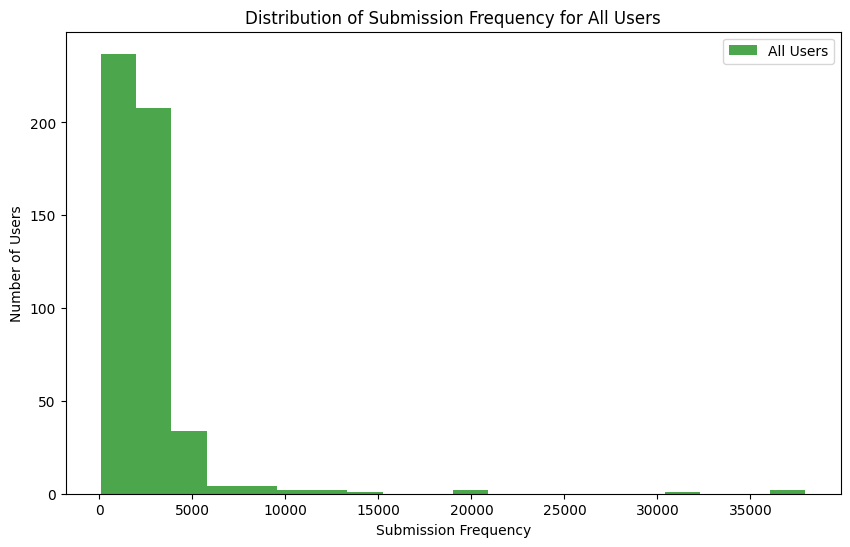

In [20]:
user_submission_frequency = data.groupby('user_id').size()

# 区分高活跃用户和低活跃用户
high_active_users = user_submission_frequency[user_submission_frequency > user_submission_frequency.quantile(0.8)]
low_active_users = user_submission_frequency[user_submission_frequency < user_submission_frequency.quantile(0.2)]

# 显示结果
print('高活跃用户:\n', high_active_users)
print('低活跃用户:\n', low_active_users)

# 可视化所有用户提交次数分布（
plt.figure(figsize=(10, 6))
plt.hist(user_submission_frequency, bins=20, alpha=0.7, label='All Users', color='green')
plt.xlabel('Submission Frequency')
plt.ylabel('Number of Users')
plt.title('Distribution of Submission Frequency for All Users')
plt.legend()
plt.show()

探究用户活跃时间分布

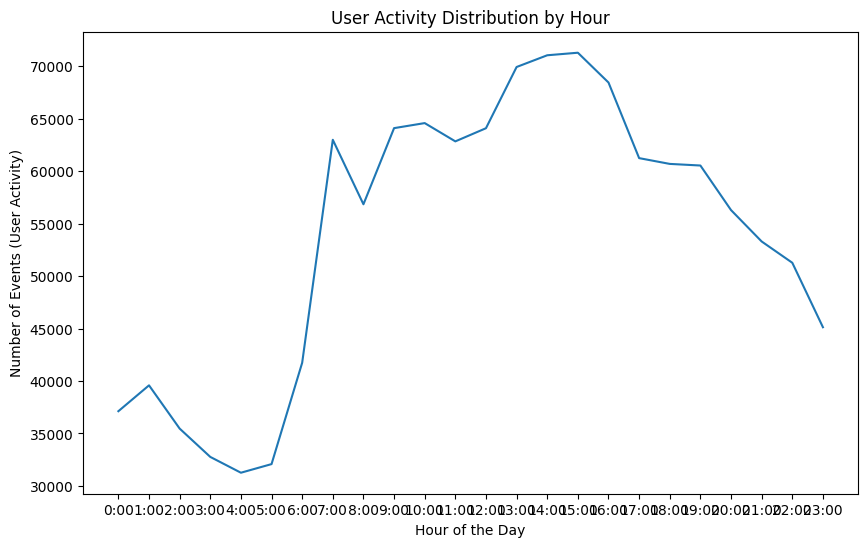

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('users_combined_info_500.csv')

# 将event_time列转换为日期时间类型
data['event_time'] = pd.to_datetime(data['event_time'])

# 提取小时信息并统计每个小时内的事件数量，以此表示用户活跃程度
hourly_activity = data['event_time'].dt.hour.value_counts().sort_index()

# 可视化按小时统计的用户活跃时间分布
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='line')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events (User Activity)')
plt.title('User Activity Distribution by Hour')
plt.xticks(range(24), [f"{i}:00" for i in range(24)])
plt.show()



探究不同国家用户的平均影响力

country
Netherlands             874.232403
South Korea             754.195618
Egypt                   644.220337
Malaysia                597.661397
Switzerland             596.237744
United States           590.065086
Lebanon                 572.721558
Colombia                560.299500
Taiwan                  546.809248
United Kingdom          545.631840
France                  534.898156
China                   531.934488
Finland                 530.576653
Germany                 528.531233
Ecuador                 525.836304
Hong Kong               523.849151
Bulgaria                511.203428
Czechia                 495.065467
Poland                  491.492678
Austria                 483.137525
Japan                   481.463567
United Arab Emirates    476.588684
Indonesia               474.951807
Denmark                 472.164968
Canada                  468.807759
Kenya                   464.712128
India                   459.659569
Vietnam                 455.271332
Australia   

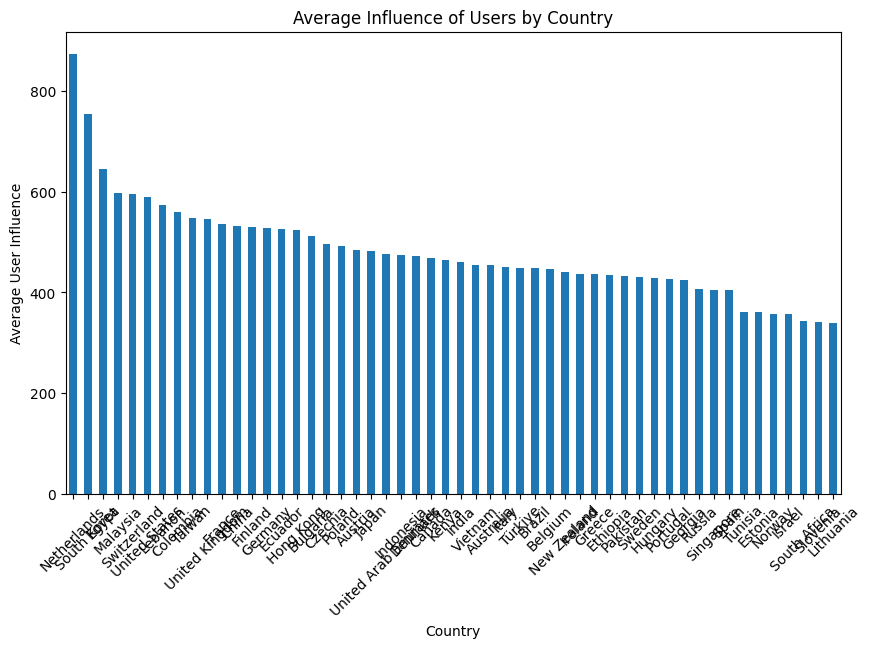

In [3]:
import pandas as pd

# 读取数据
data = pd.read_csv('users_combined_info_500.csv')

# 按照国家分组，并计算每个国家用户的平均影响力
average_influence_by_country = data.groupby('country')['total_influence'].mean()

# 按平均影响力降序排序
sorted_average_influence_desc = average_influence_by_country.sort_values(ascending=False)

# 查看降序排序后的结果
print(sorted_average_influence_desc)

# 可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_average_influence_desc.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average User Influence')
plt.title('Average Influence of Users by Country')
plt.xticks(rotation=45)  
plt.show()
